In [12]:
#by Willkie
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#https://discord.com/channels/1134059900666916935/1283610000484208670

In [13]:
%run _01_data_loading.ipynb

Data saved as data/output/1219.csv
Processed valid data saved as data/output/1219_processed.csv
Data saved as data/output/1218.csv
Processed valid data saved as data/output/1218_processed.csv
Data saved as data/output/1224.csv
Processed valid data saved as data/output/1224_processed.csv
Data saved as data/output/1220.csv
Processed valid data saved as data/output/1220_processed.csv
Data saved as data/output/1221.csv
Processed valid data saved as data/output/1221_processed.csv
Data saved as data/output/1223.csv
Processed valid data saved as data/output/1223_processed.csv
Data saved as data/output/1222.csv
Processed valid data saved as data/output/1222_processed.csv
Data saved as data/output/1213.csv
Processed valid data saved as data/output/1213_processed.csv
Data saved as data/output/1212.csv
Processed valid data saved as data/output/1212_processed.csv
Data saved as data/output/1211.csv
Processed valid data saved as data/output/1211_processed.csv
Data saved as data/output/1215.csv
Proce

In [14]:
df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,1,오전 12:33,88,허밋,None,붉켄,2024-12-19,True,False,18.446821,18.446821,1655.833510
1,1,오전 12:33,101,레인저,None,붉켄,2024-12-19,True,False,22.312474,22.312474,2234.250534
2,2,오전 12:33,90,허밋,None,붉켄,2024-12-19,True,False,18.446821,18.446821,1669.654216
3,2,오전 12:33,99,허밋,None,붉켄,2024-12-19,True,False,18.446821,18.446821,1784.505716
4,2,오전 12:33,105,썬콜,650,붉켄,2024-12-19,True,True,6.190476,6.212019,650.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4664,292,오후 1:59,143,용기사,5000,블와둥,2024-12-17,True,True,34.965035,35.282984,5000.000000
4665,297,오후 1:59,119,프리스트,None,검켄,2024-12-17,True,False,6.320755,6.320755,769.770896
4666,297,오후 1:59,134,프리스트,None,검켄,2024-12-17,True,False,6.320755,6.320755,870.120072
4667,300,오후 1:59,123,프리스트,None,None,2024-12-17,False,False,6.320755,6.320755,766.562236


In [15]:
processed_df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,2,오전 12:33,105,썬콜,650,붉켄,2024-12-19,True,True,6.190476,6.212019,650.0
1,2,오전 12:33,118,썬콜,726,붉켄,2024-12-19,True,True,6.152542,6.212019,726.0
2,13,오전 12:34,128,불독,795,협동,2024-12-19,True,True,6.210938,6.210938,795.0
3,18,오전 12:34,124,용기사,4200,블와둥,2024-12-19,True,True,33.870968,34.726694,4200.0
4,34,오전 12:35,144,허밋,2652,망용둥,2024-12-19,True,True,18.416667,18.446821,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...
539,260,오후 1:57,106,나이트,3143,듀파,2024-12-17,True,True,29.650943,30.555809,3143.0
540,260,오후 1:57,89,나이트,2800,듀파,2024-12-17,True,True,31.460674,30.555809,2800.0
541,263,오후 1:57,106,프리스트,670,불어전,2024-12-17,True,True,6.320755,6.320755,670.0
542,263,오후 1:57,107,용기사,3400,불어전,2024-12-17,True,True,31.775701,35.282984,3400.0


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party_id           4669 non-null   int64  
 1   time               4669 non-null   object 
 2   level              4669 non-null   int64  
 3   job                4669 non-null   object 
 4   spec               637 non-null    float64
 5   map                4186 non-null   object 
 6   date               4669 non-null   object 
 7   valid              4669 non-null   bool   
 8   valid_spec         4669 non-null   bool   
 9   spec_by_level      4332 non-null   float64
 10  avg_spec_by_level  4332 non-null   float64
 11  spec_filled        4332 non-null   float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 374.0+ KB
None

Data Overview:
   party_id      time  level  job   spec map        date  valid  valid_spec  \
0         1  오전 12:33     88   허밋   

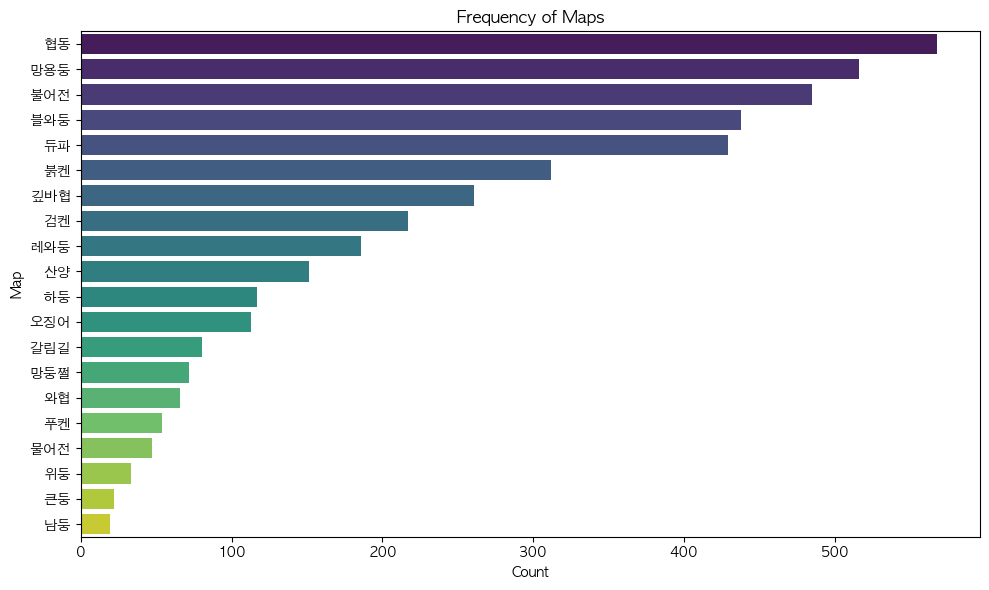

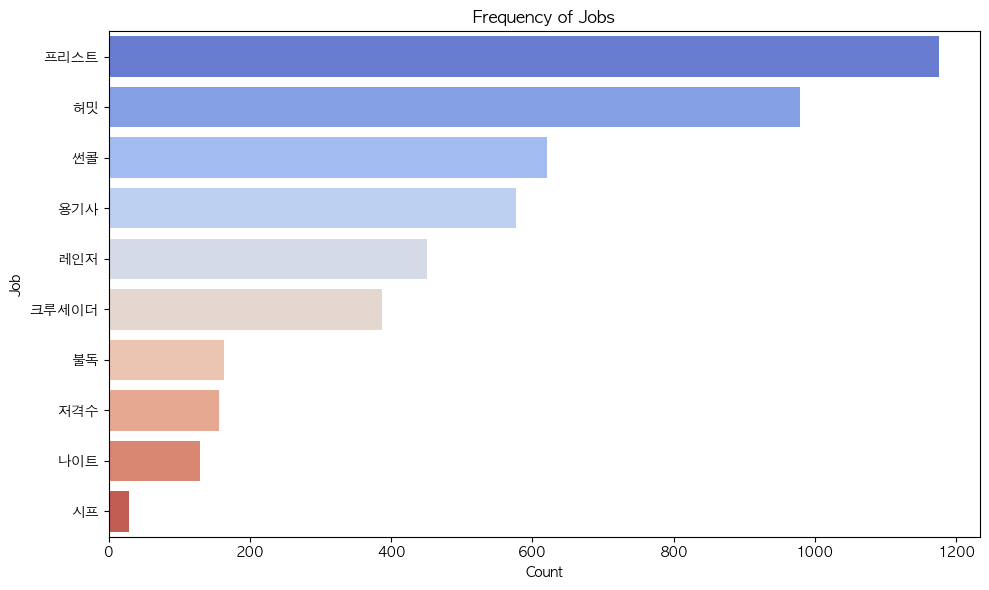

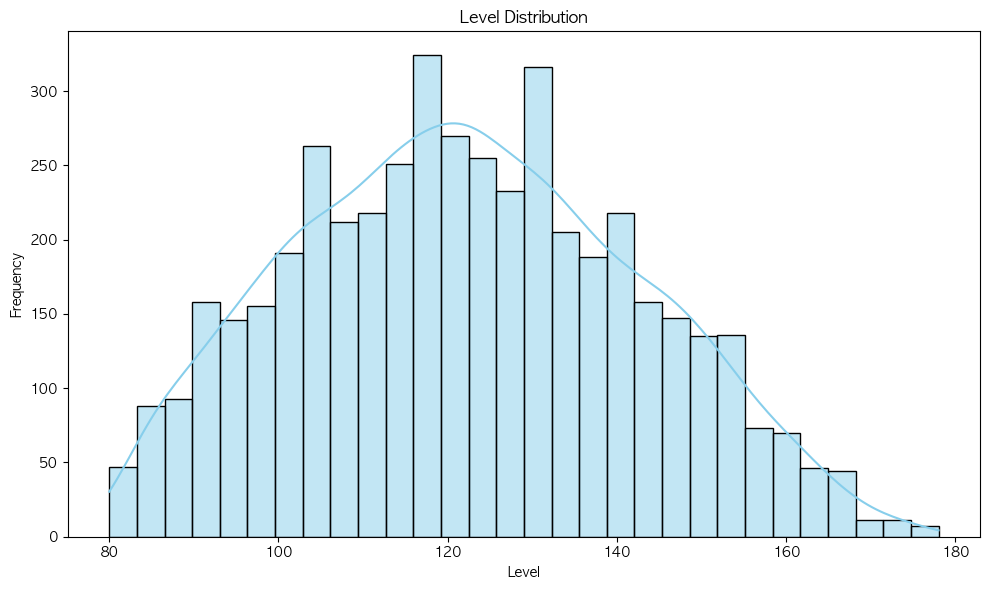

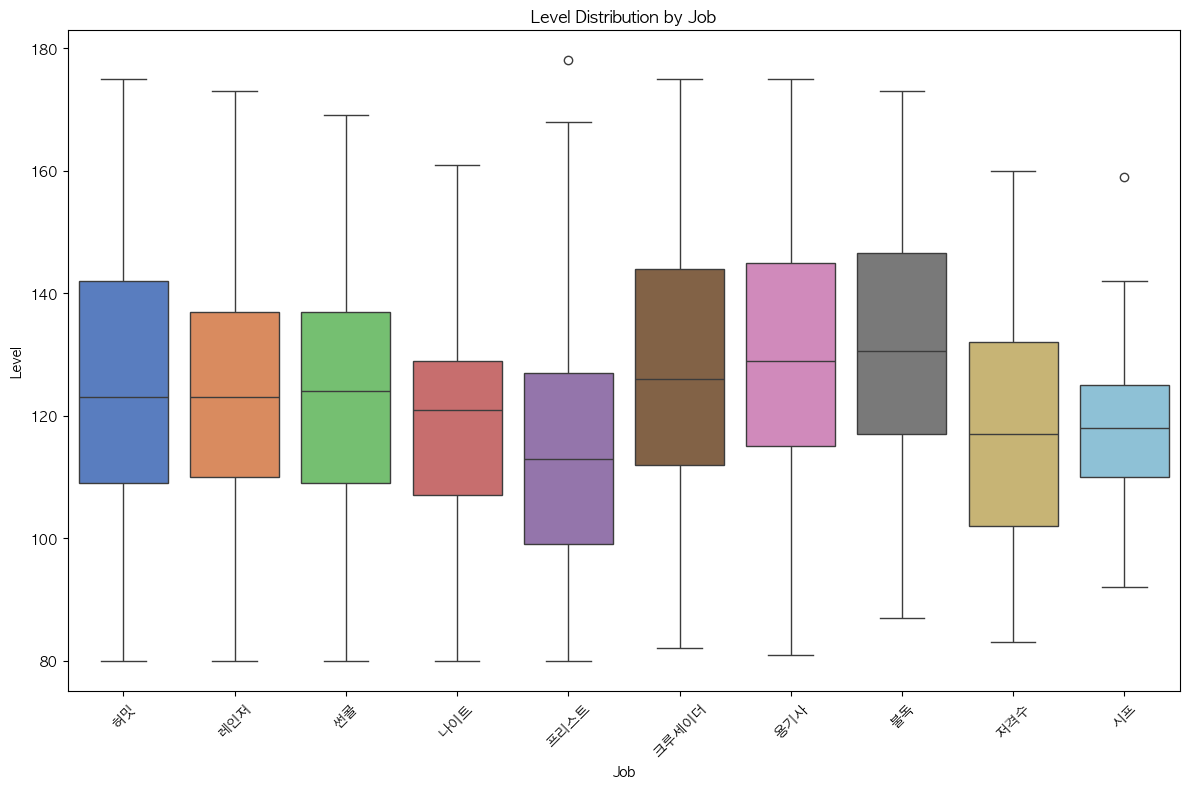

In [16]:
%run _02_eda.ipynb

map_dist(df)
job_dist(df)
level_dist(df)
level_dist_by_job(df)

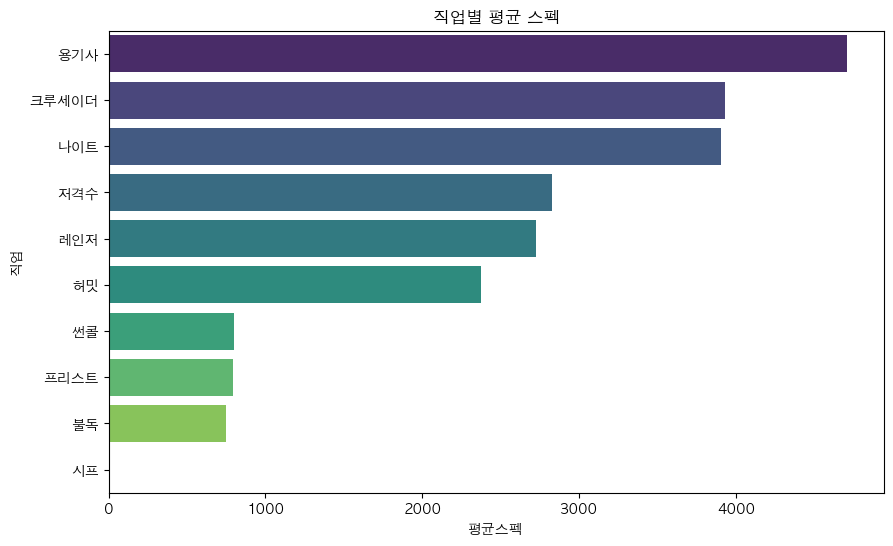

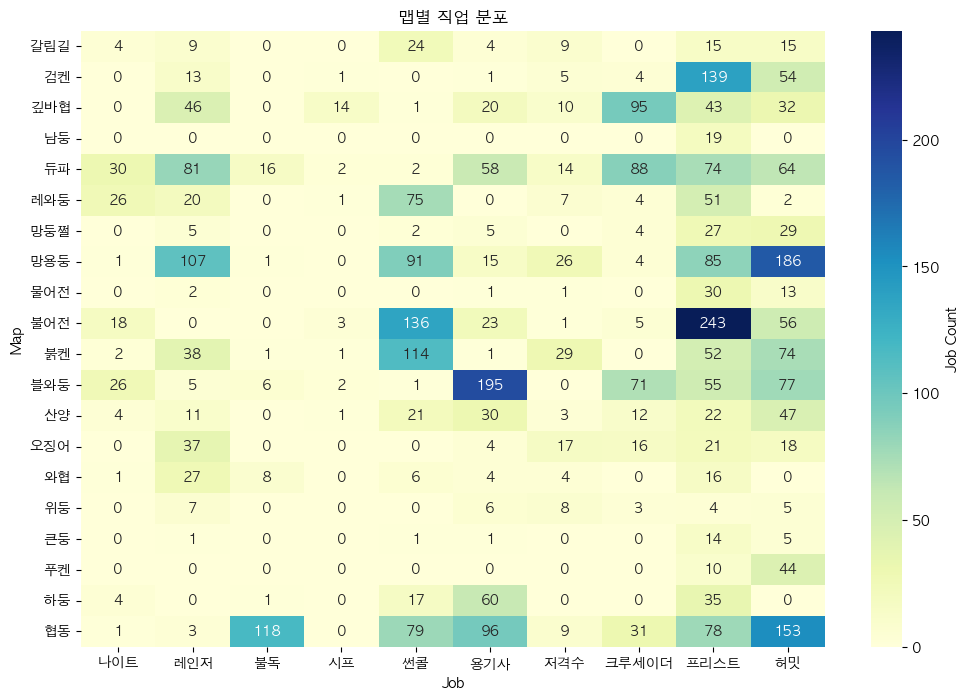

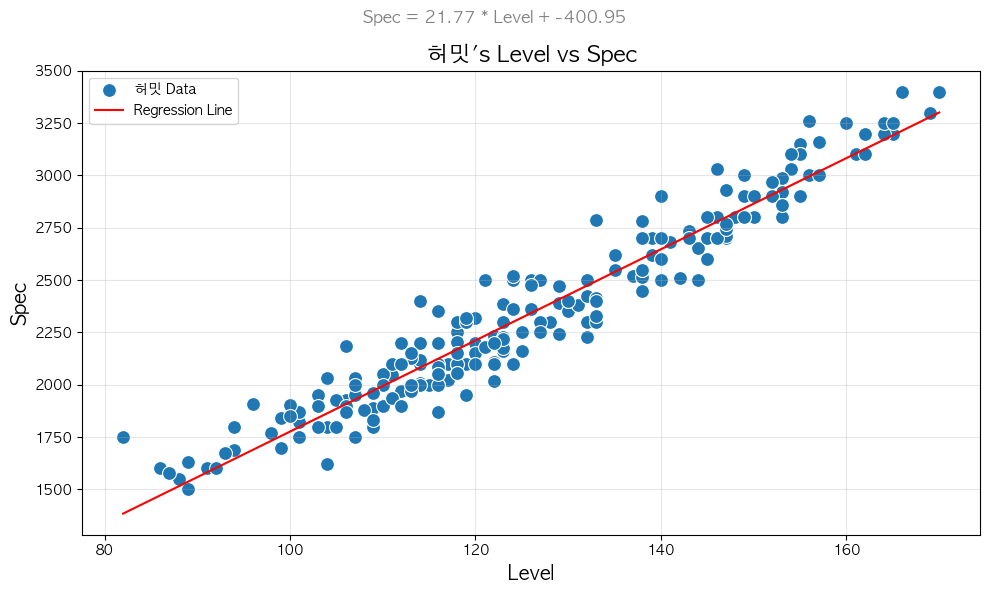

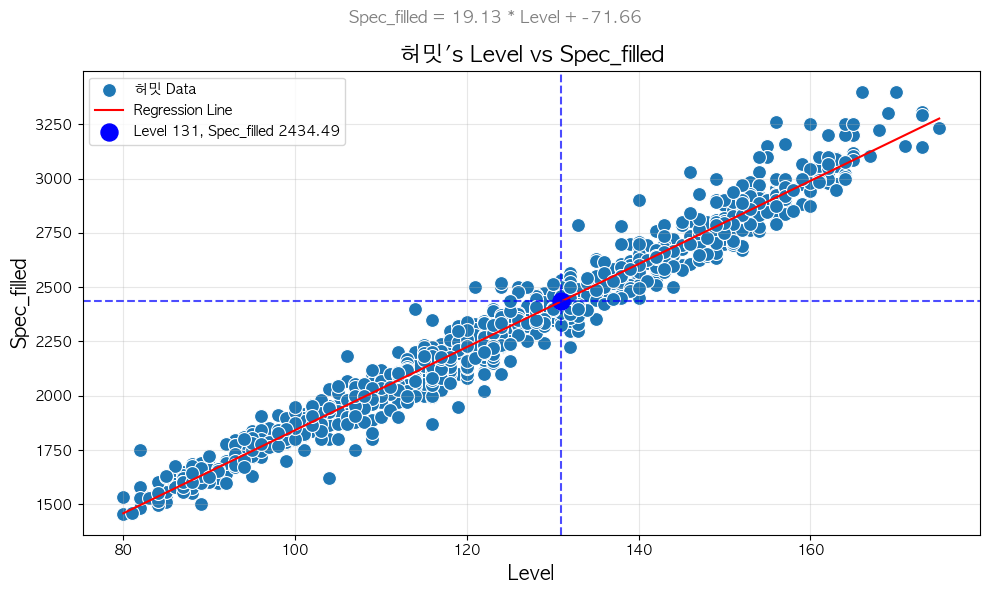

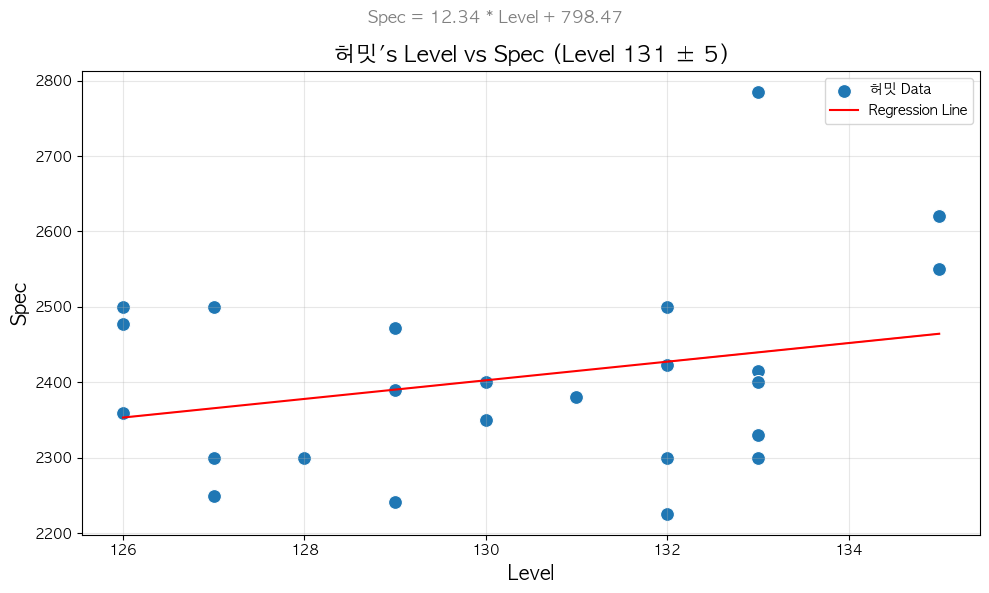

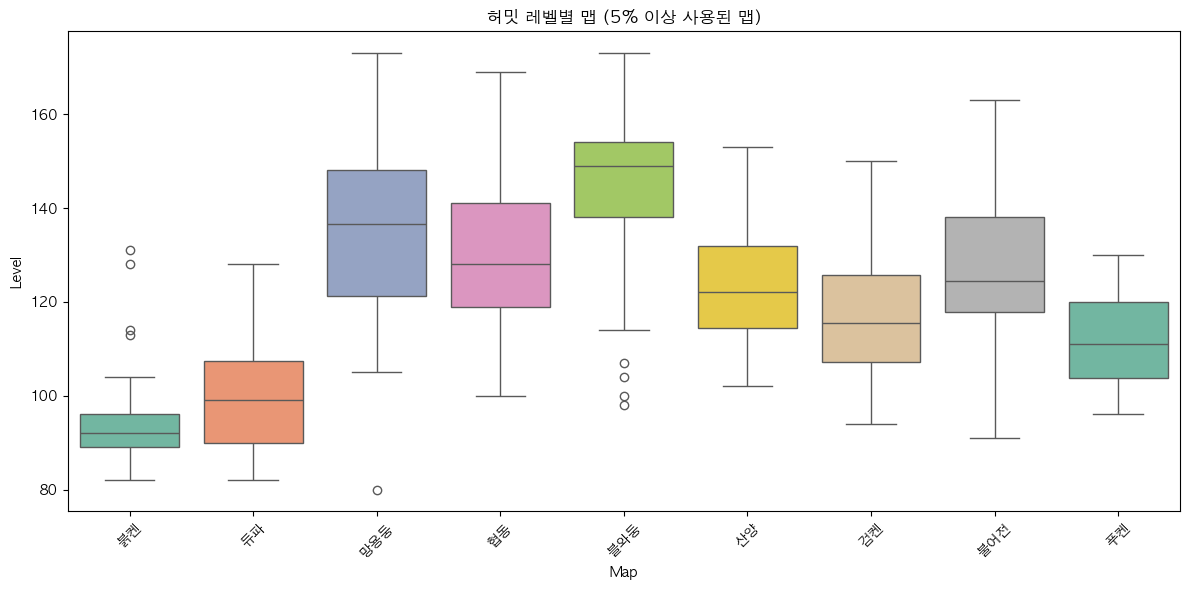

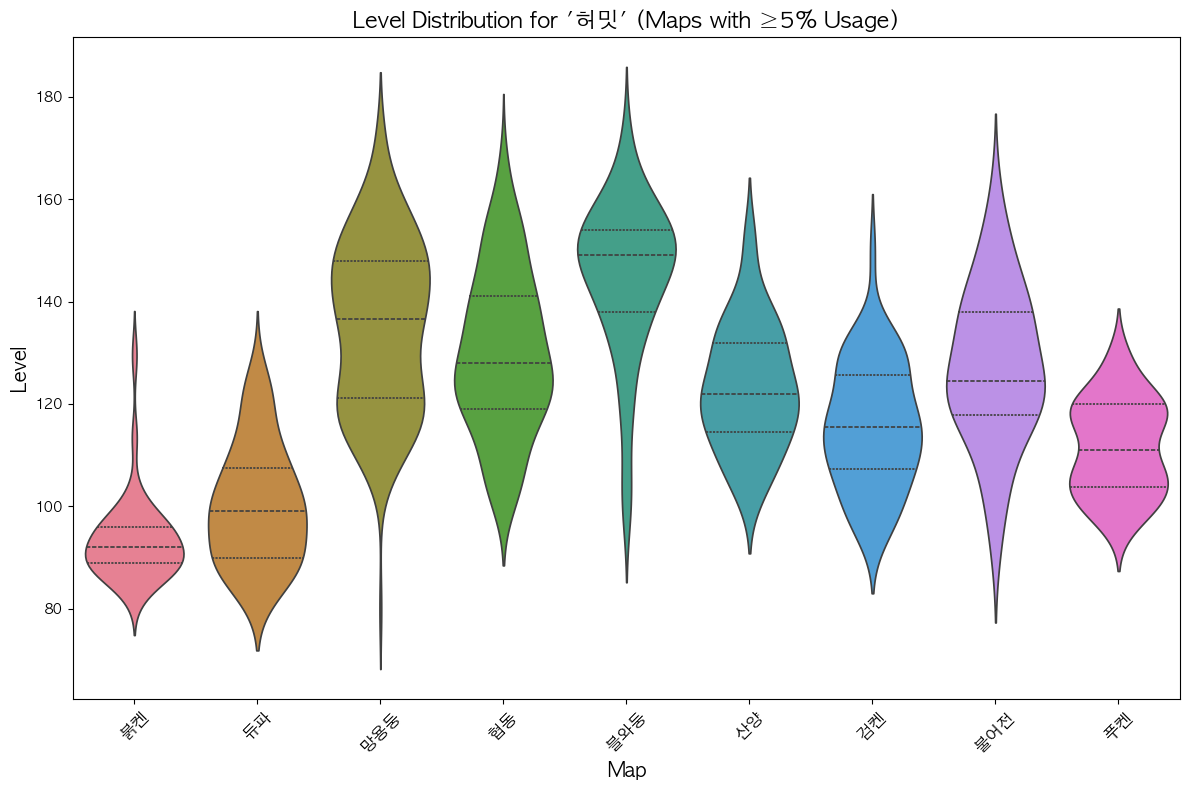

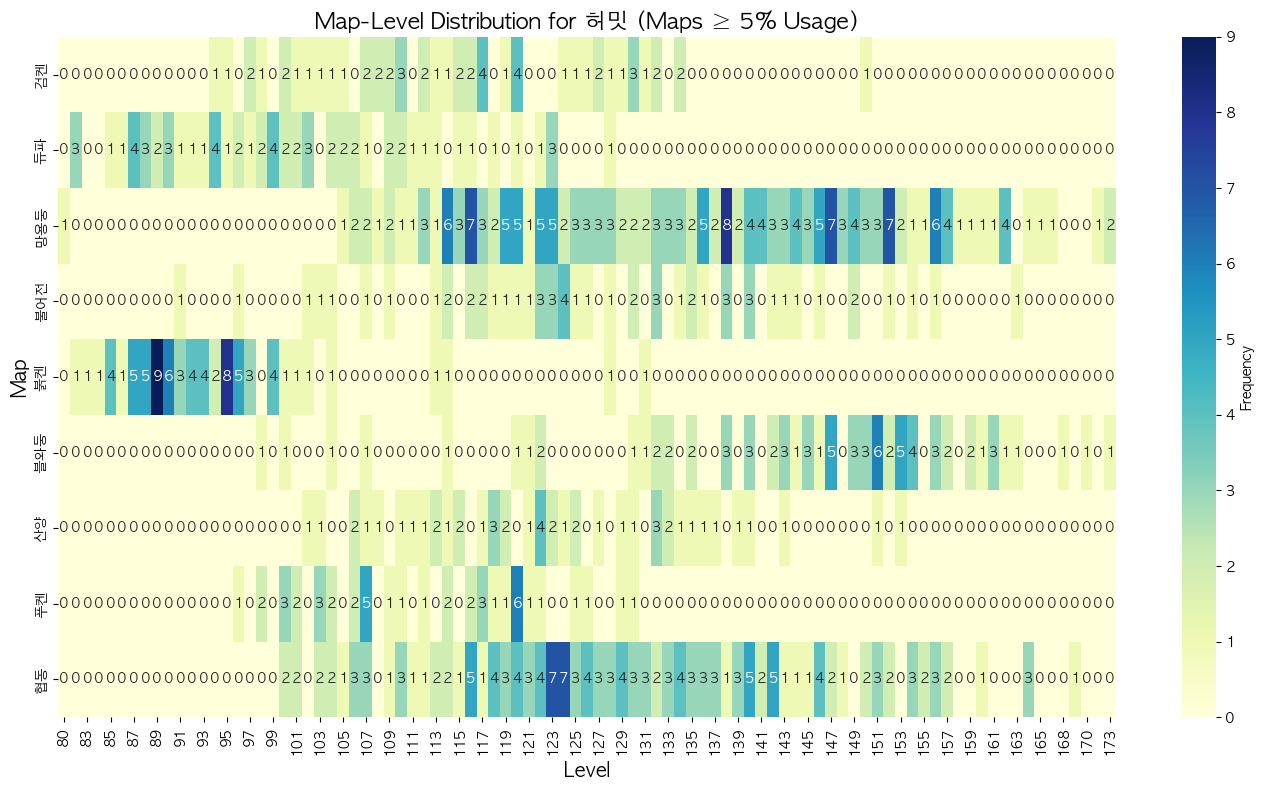

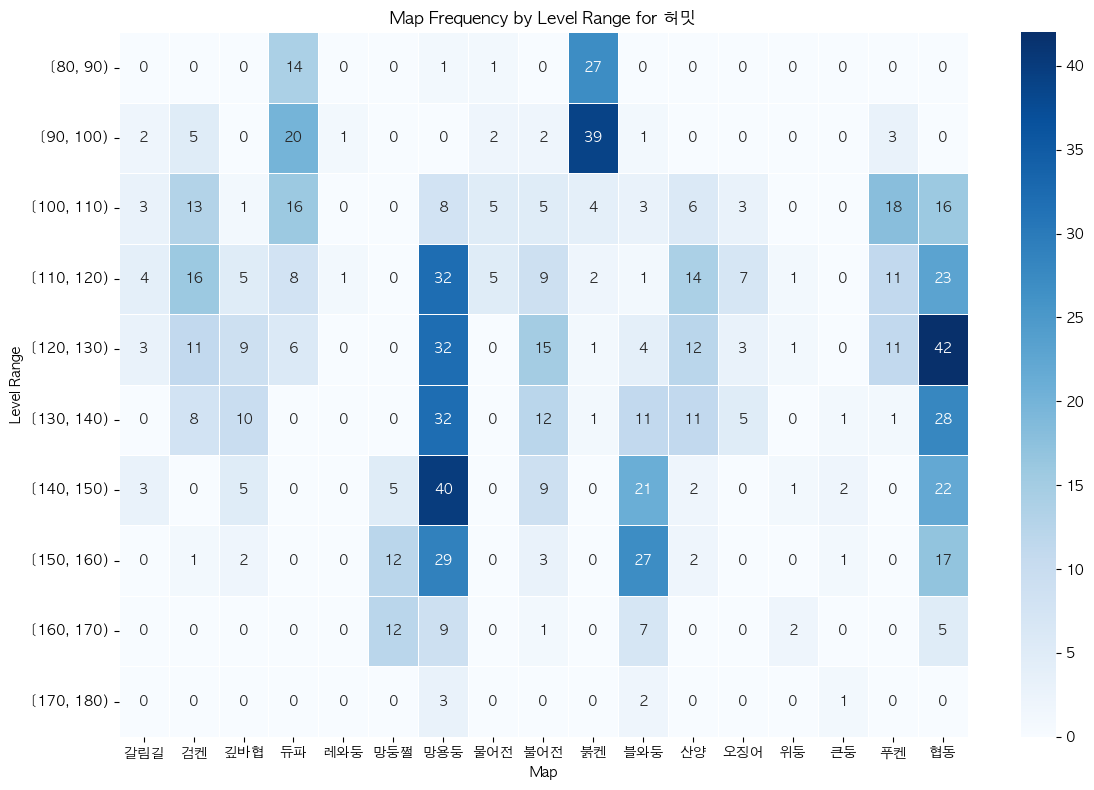

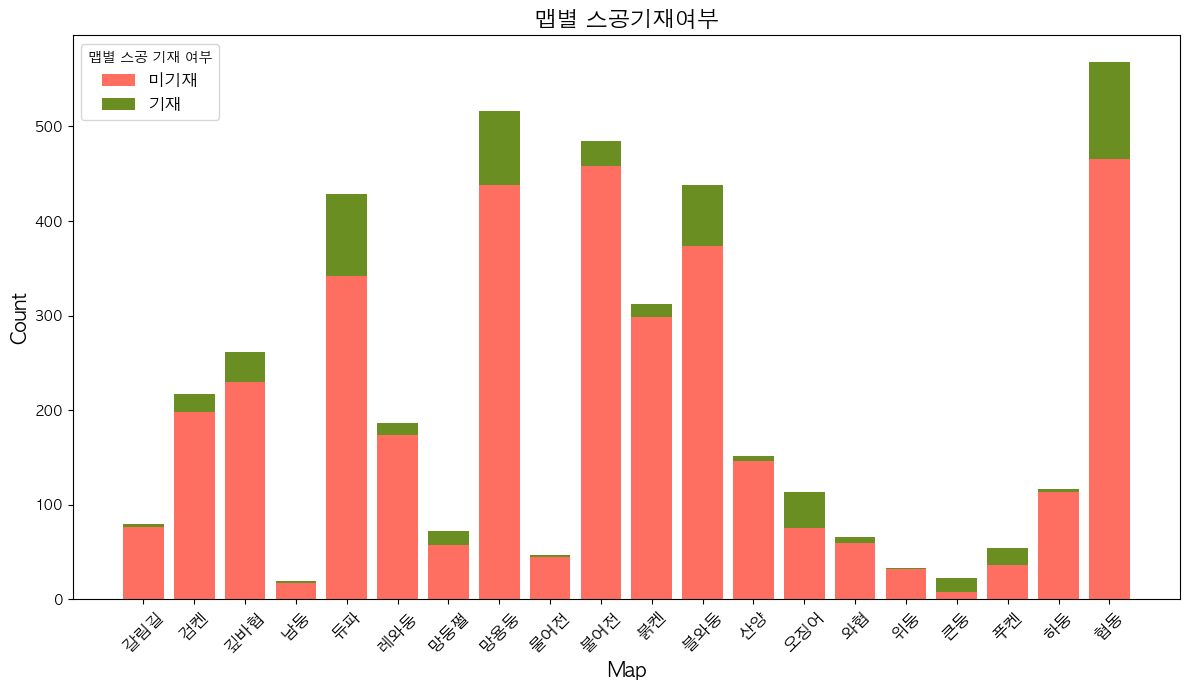

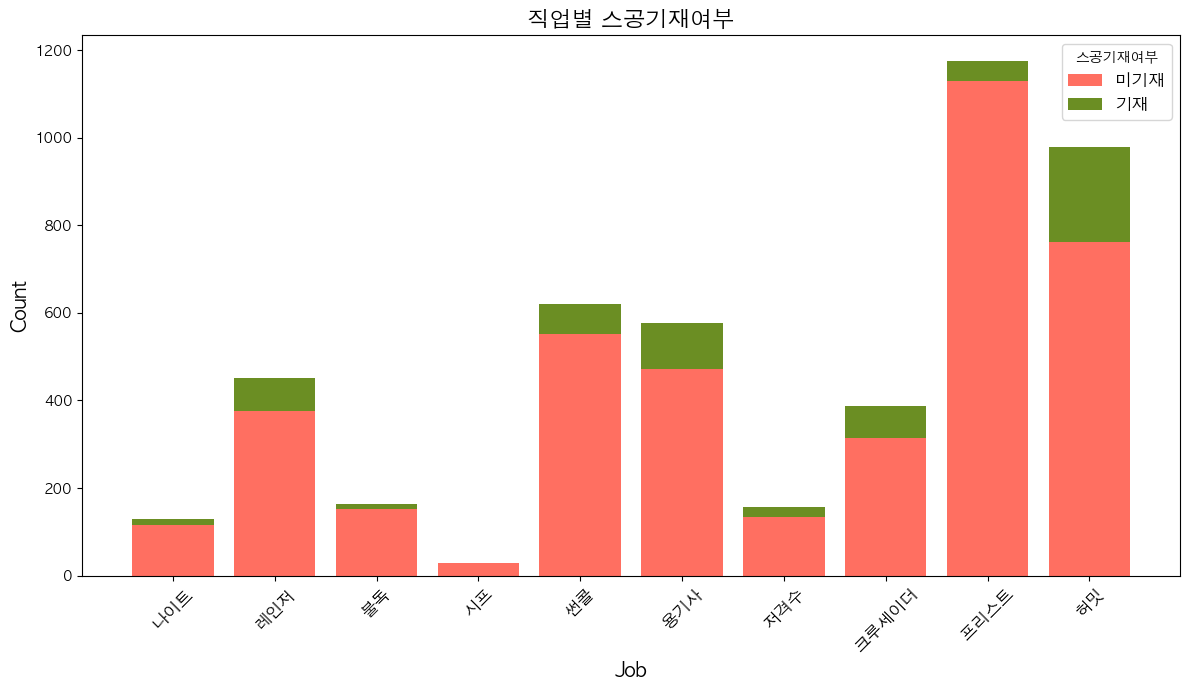

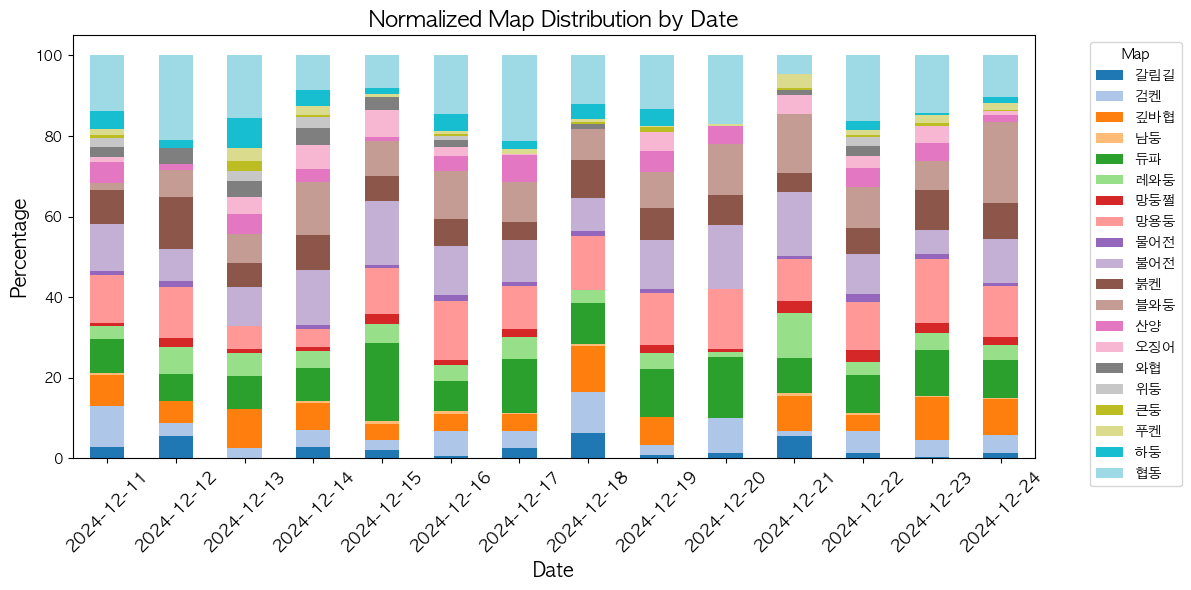

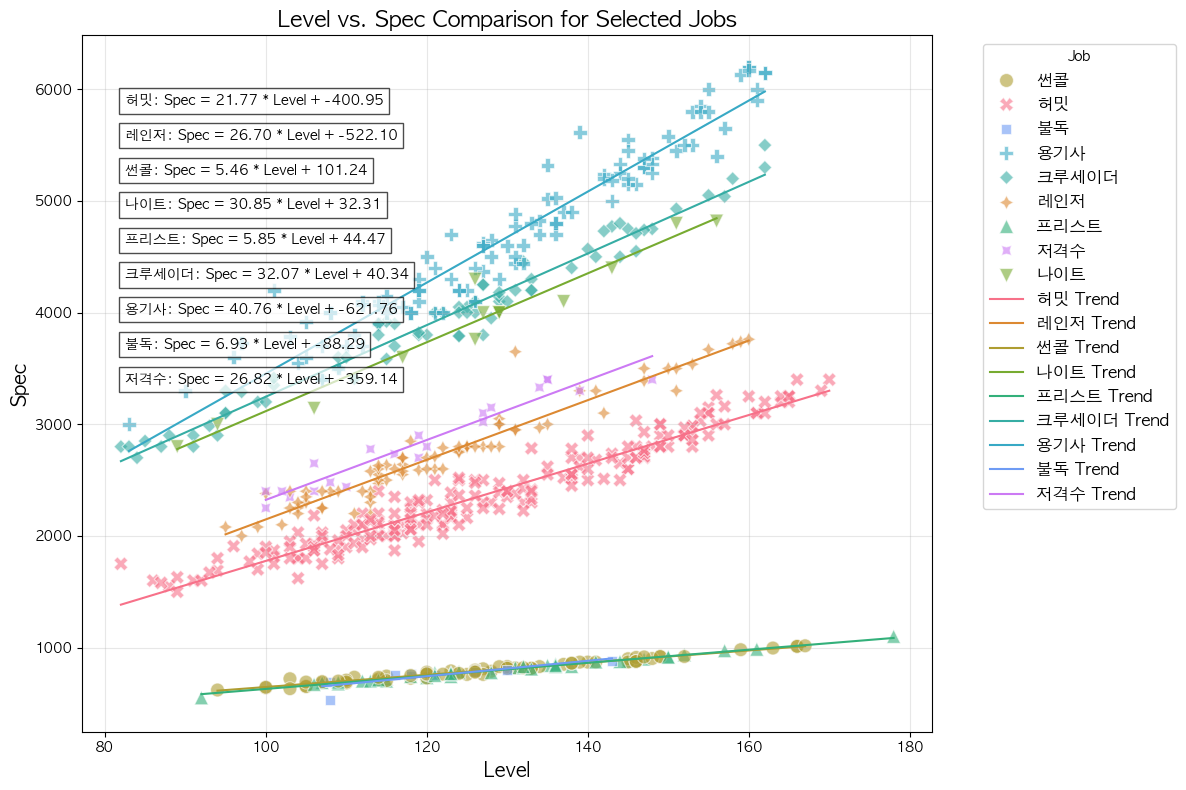

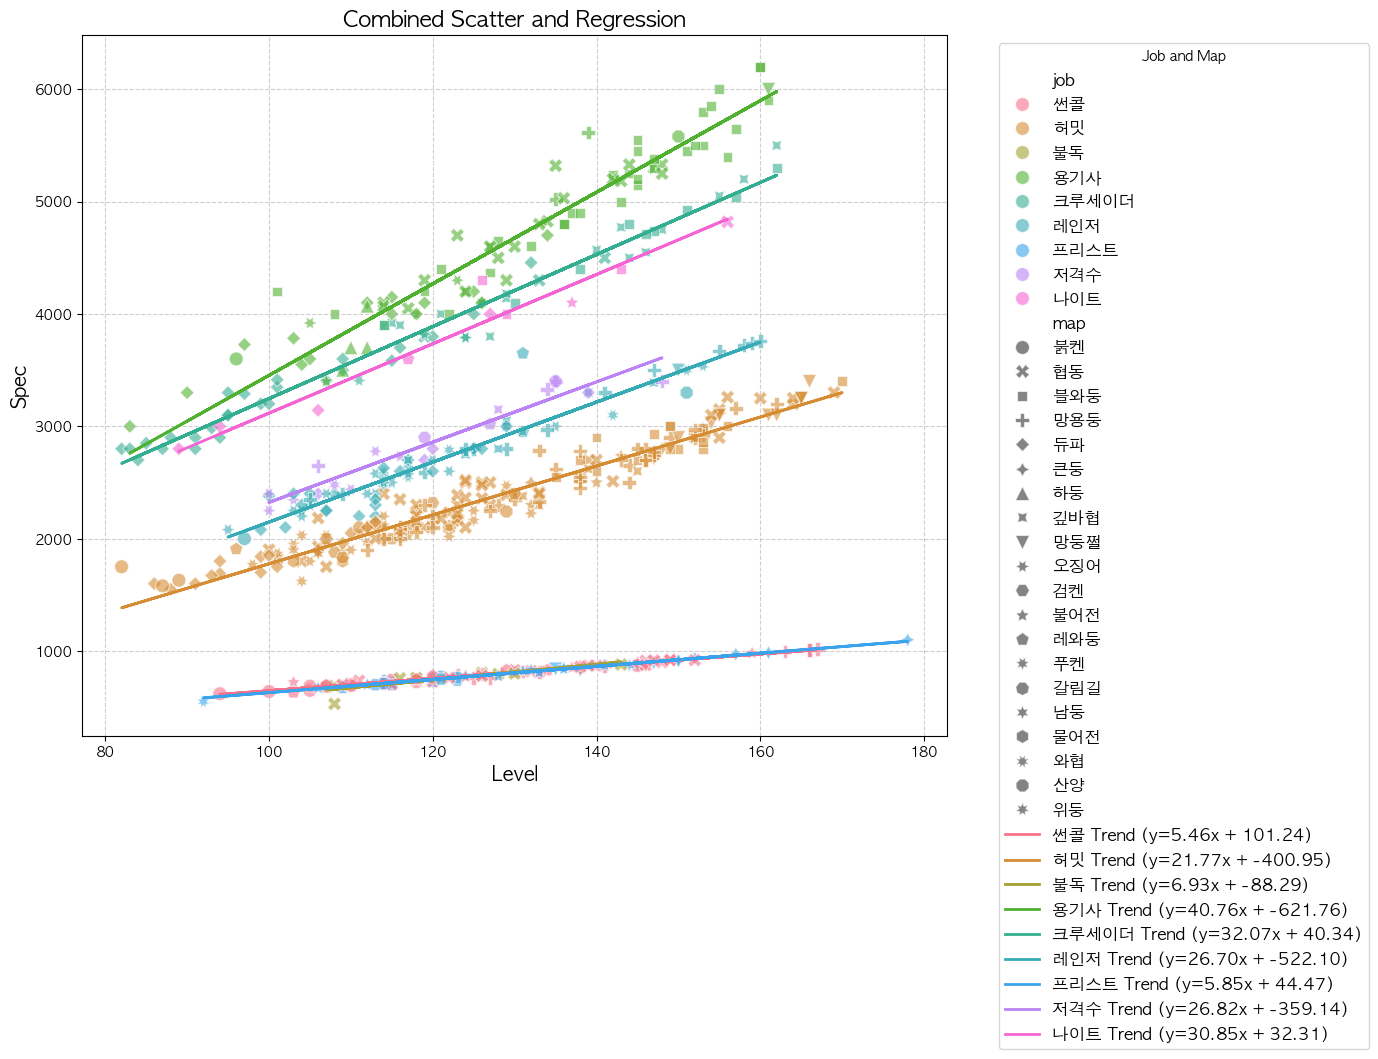

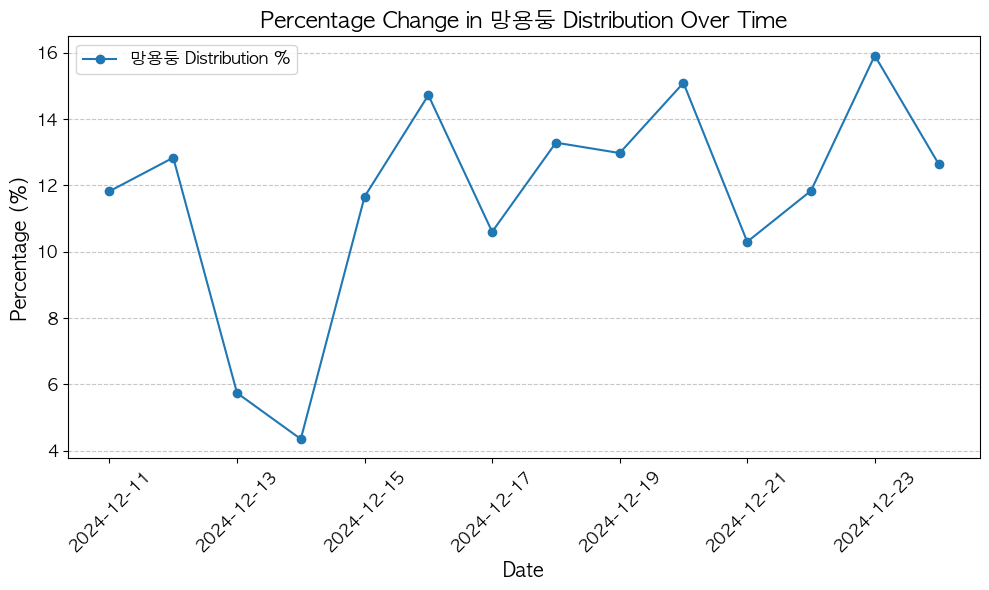

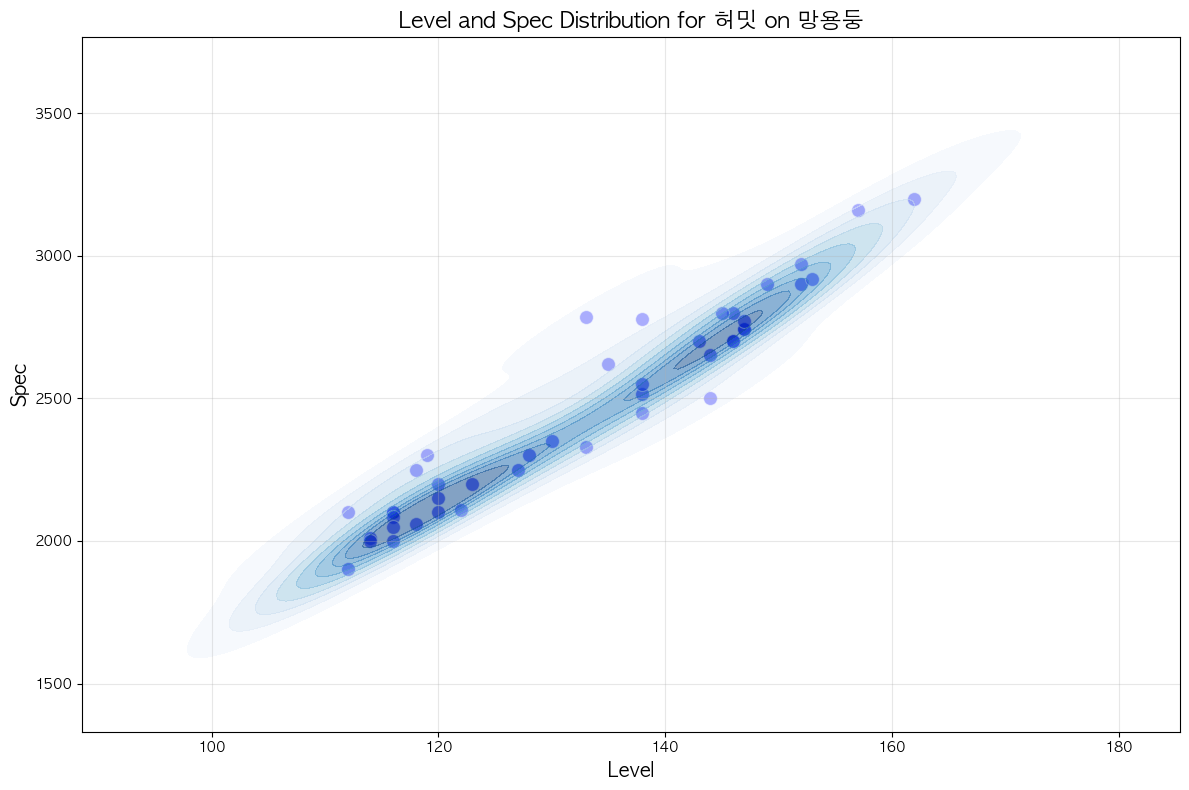

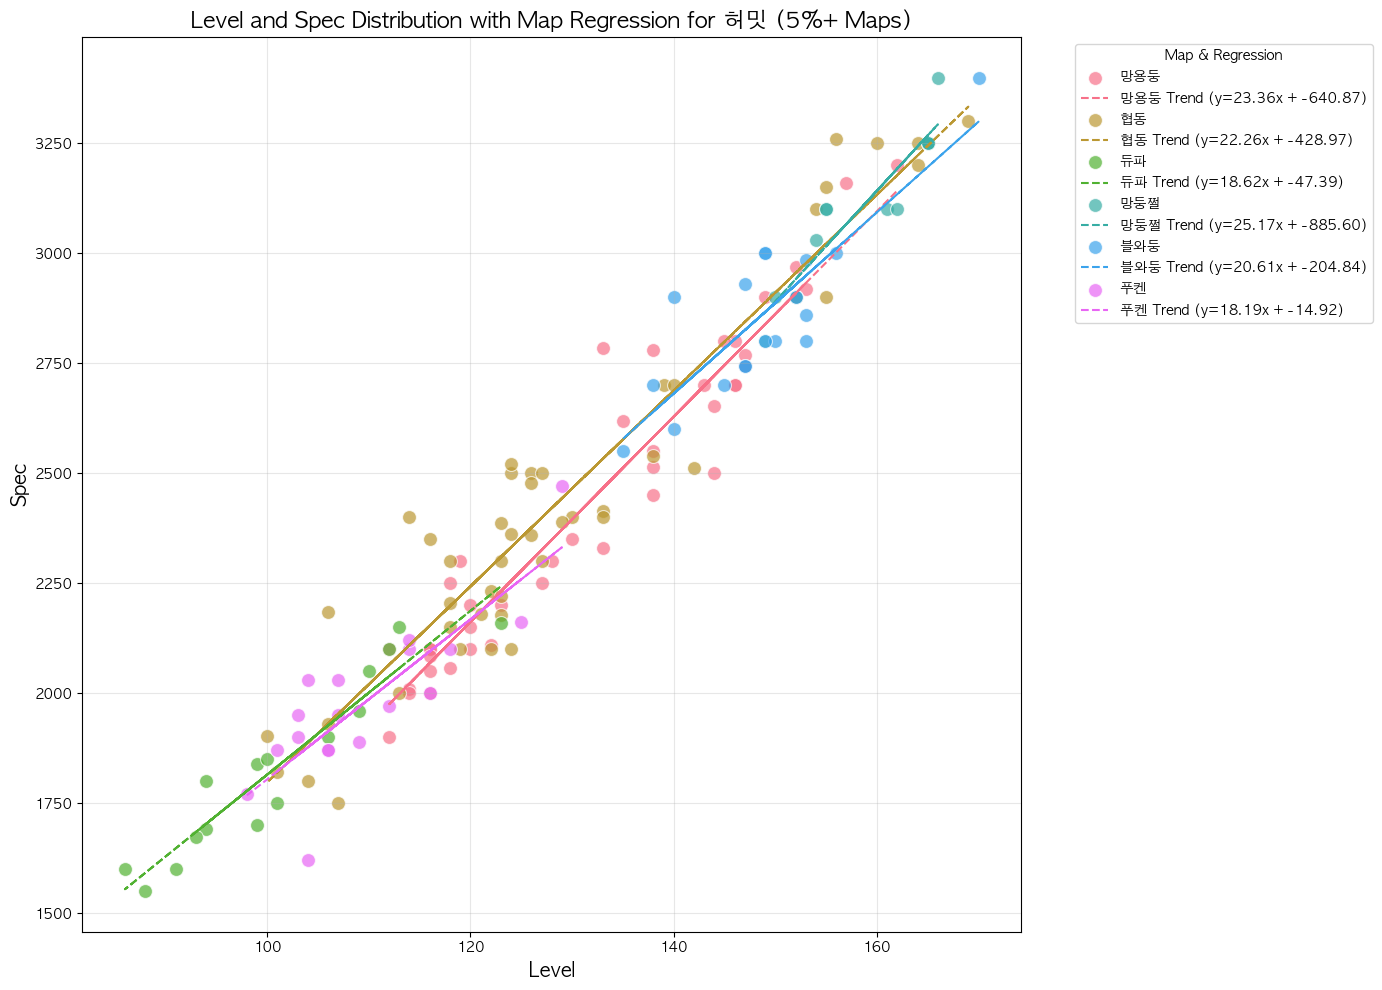

In [17]:
%run _03_data_visualization.ipynb

job="허밋"
jobs=["허밋", "썬콜", "용기사"]
input_map="망용둥"
input_maps=["망용둥", "불어전"]
start_level=120
end_level=160
input_level=131

#1 직업별 평균 스펙
average_spec_by_job(df)
#2 맵별 직업 분포
plot_job_frequency_by_map(df)
#3 특정 직업, 레벨(optional), 스펙_filled
plot_level_spec_with_regression(df, job)
plot_level_spec_with_regression(df, job, input_level=input_level, use_spec_filled=True)
#4 레벨+-5의 스펙 회귀
plot_level_spec_with_regression_by_level(df, job, input_level)
#5 특정 직업의 레벨 별 맵 분포
plot_level_by_map_by_job(df, job)
#6 특정직업의 레벨별 사냥터 분포(5%+)
plot_level_distribution_by_job_and_map(df, job)
#7 특정 직업의 레벨별 맵 히트맵
plot_map_level_heatmap_for_job(df, job)
#8 특정직업의 레벨 범위별 사냥터 히트맵 
plot_map_frequency_by_level_range(df, job)
#9 맵별 스펙 기재 여부
visualize_spec_validity_by_map(df, job='all')
#10 직업별 스펙 기재 여부, job optional
visualize_spec_validity_by_jobs(df, jobs=None)
#11 날짜별 맵 사용 비율
visualize_map_distribution_by_date(df)
#12 직업별 레벨(범위 설정 가능)당 스펙
visualize_level_spec_comparison(df, jobs=None, start_level=None, end_level=None)
#13 직업별 레벨에 따른 스공과 맵, 회귀
plot_combined_scatter_with_regression(df, start_level=None, end_level=None, maps=None)
#14 맵 사용빈도 변화 추이
visualize_map_percentage_change(df, input_map)
#15 특정 직업의 맵 레벨과 스펙에 따른 분포도
plot_level_spec_distribution_of_job_and_map(df, input_map, job, use_spec_filled=False)
#16 특정 직업의 맵별분포와 레벨, 스펙 회귀
plot_level_spec_distribution_of_job(df, job)

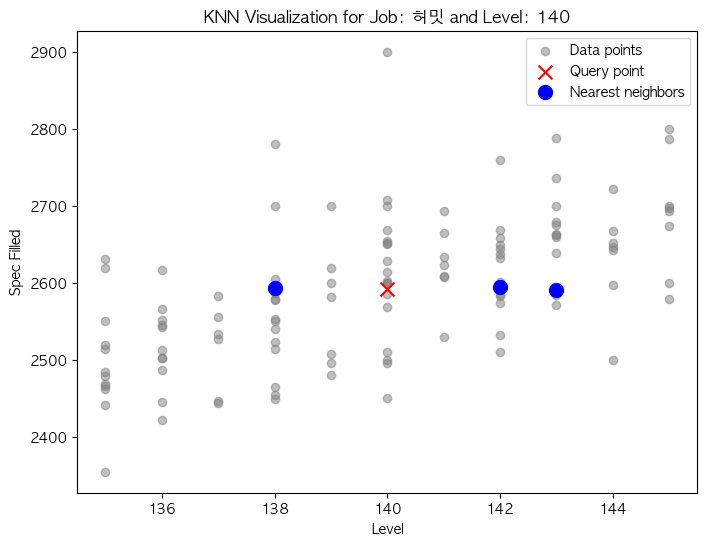

Similarity scores for recommended maps:
Map: 불어전, Score: 2.3484968202181133
Map: 깊바협, Score: 3.0139717627612077
Map: 갈림길, Score: 3.1682511813165886
Recommended Maps and Scores: ['불어전', '깊바협', '갈림길']


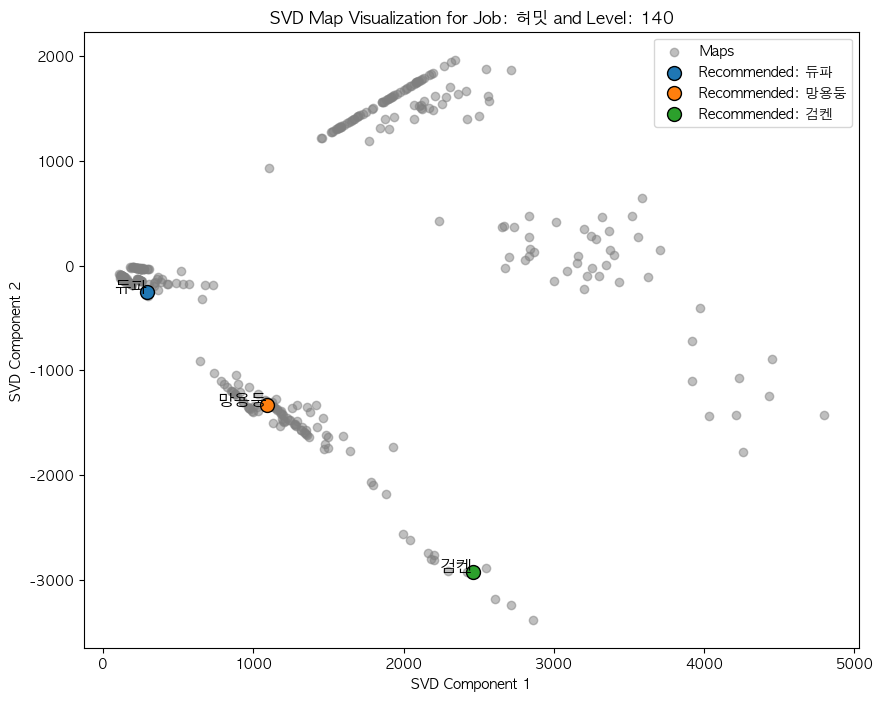

Unique maps after preprocessing:
['붉켄' '듀파' '망용둥' '협동' '블와둥' '산양' '검켄' '불어전' '푸켄']
Similarity scores for recommended maps:
Map: 망용둥, Score: 0.9999999999999989
Map: 검켄, Score: -1.6653345369377348e-16
Map: 듀파, Score: -3.677613769070831e-16
Recommended Maps: Index(['망용둥', '검켄', '듀파'], dtype='object', name='map')
Filtering out the top 99.9% outliers with distance greater than 2.4914514422811544


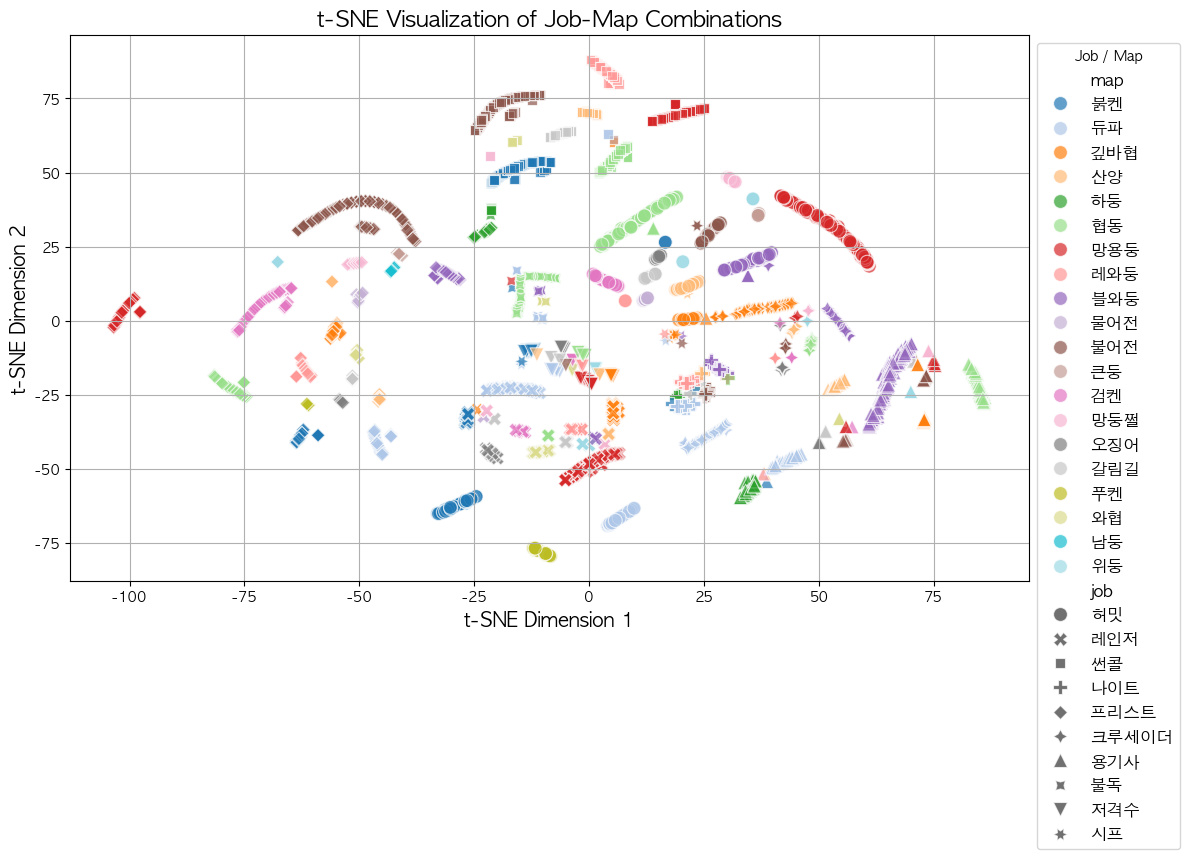

      party_id      time  level    job  spec  map        date  valid  \
1081        11  오전 12:36  144.0  크루세이더   NaN   협동  2024-12-20   True   
2494       228   오후 4:38   80.0   프리스트   NaN  망둥쩔  2024-12-12   True   
3675       171  오전 12:45  135.0    용기사   NaN  물어전  2024-12-16   True   
3791       281  오전 12:55  120.0     시프   NaN   검켄  2024-12-16   True   
4118       677   오전 1:39  144.0     썬콜   NaN  블와둥  2024-12-16   True   

      valid_spec  spec_by_level  avg_spec_by_level  spec_filled  tsne_dim1  \
1081       False            NaN                NaN  2212.976086  12.346916   
2494       False            NaN                NaN  2212.976086 -56.429237   
3675       False      35.369864          35.369864  4669.431181  60.544640   
3791       False            NaN                NaN  2212.976086   1.626916   
4118       False       6.226383           6.226383   916.182370   6.451586   

      tsne_dim2  distance_to_nearest  
1081  41.008720             3.516124  
2494 -38.087200     

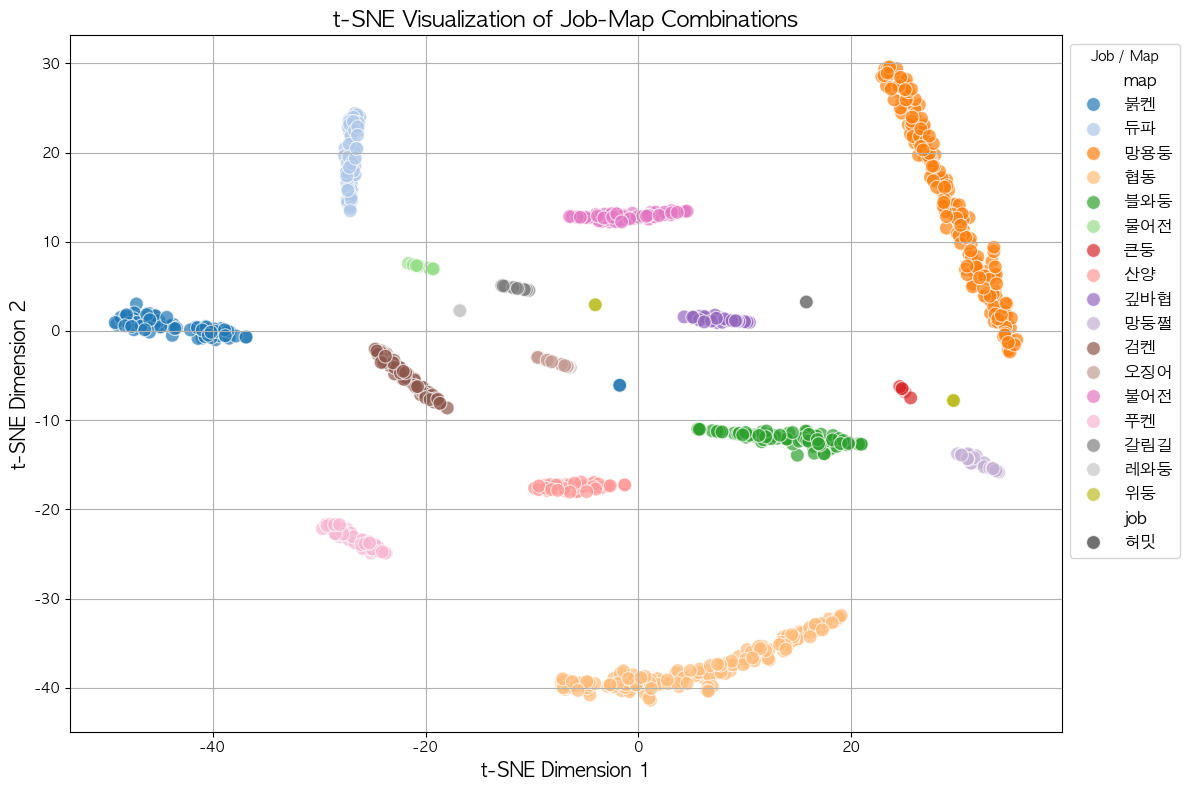

     party_id     time  level job  spec  map        date  valid  valid_spec  \
350       198  오후 9:10   80.0  허밋   NaN  망용둥  2024-12-19   True       False   

     spec_by_level  avg_spec_by_level  spec_filled  tsne_dim1  tsne_dim2  \
350      18.446821          18.446821  1457.268648 -16.404711  33.436558   

     distance_to_nearest  
350             1.539059  


In [18]:
%run _04_modeling.ipynb
recommended_maps = recommend_map_knn(140, job, level_range=5)
recommended_maps = recommend_map_svd(140, job, level_range=5)
process_tsne(df)
process_tsne(df[df['job'] == job])

In [19]:
#by Willkie